In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

In [2]:
#Prepare the training and validation datasets: 80% training, 20% validation

# Convert data to PyTorch tensors
inp_tensor = torch.tensor(inp, dtype=torch.float32).reshape(-1,1)
out_tensor = torch.tensor(out, dtype=torch.float32).reshape(-1,1)

# split data into training and validation sets
train_size = int(0.8 * len(inp_tensor))
train_data, val_data = inp_tensor[:train_size], inp_tensor[train_size:]

In [3]:
#Create a NN that consists of:
# a linear layer of input size 1 and output size 15, followed by hyperbolic tangent as its activation function
# a linear layer of input size 15 and output size 23, followed by hyperbolic tangent as its activation function
# a linear layer of input size 23 and output size 1

# define the newural network
model = nn.Sequential(
    nn.Linear(1,15),
    nn.Tanh(),
    nn.Linear(15,23),
    nn.Tanh(),
    nn.Linear(23,1),
)

# Write a little script that shows the number of parameters in each layer.
# Based on the output of this script, report as a comment in your code how many weights and biases exist in each layer.
for name, param in model.named_parameters():
    print(f"layer '{name}' has {param.numel()}.")
# Next, define the training function that receives training and validation datasets, along with a model, loss function, 
# optimizer, and number of epochs. The function must use the model's own parameter handling and the the input loss function
# to automatically calculate the gradient of the loss wrt parameters (autograd), and use optimizer to update the parameters 
# and zero the gradients. 

# training function
def train(train_data, val_data, model, loss_function, optimizer, epochs):
    train_losses = [] # list to store training losses for each epoch
    val_losses = []   # list to store validation losses for each epoch

    # training loop for the epochs
    for epoch in range(epochs):
        model.train() # set the model to training mode
        optimizer.zero_grad() # zero out gradients from previous iteration
        train_outputs = model(train_data) # compute predicted outputs
        loss = loss_function(train_outputs, train_data) # compute loss
        loss.backward() # compute gradients
        optimizer.step() # update weights and biases using gradients
        train_losses.append(loss.item()) # store training loss for this epoch

        model.eval() # set the model to evaluation mode
        with torch.no_grad(): 
            val_outputs = model(val_data) # forward pass on validation data
            val_loss = loss_function(val_outputs, val_data) # compute validation loss
            val_losses.append(val_loss.item()) # store validation loss for this epoch

        # print progress for current epoch
        print(f"Epoch: [{epoch+1}/{epochs}], " f"Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}")

    return train_losses, val_losses # return lists of training and validation losses

layer '0.weight' has 15.
layer '0.bias' has 15.
layer '2.weight' has 345.
layer '2.bias' has 23.
layer '4.weight' has 23.
layer '4.bias' has 1.


In [8]:
# Train your NN with built-in mean square error loss function and SGD optimizer. 
# Try different learning rates and number of epochs improve the results.
epochs = 100
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
train_losses, val_losses = train(train_data, val_data, model, loss, optimizer, epochs)

Epoch: [1/100], Train Loss: 2.3450, Val Loss: 2.4667
Epoch: [2/100], Train Loss: 2.1777, Val Loss: 2.3138
Epoch: [3/100], Train Loss: 2.0221, Val Loss: 2.1695
Epoch: [4/100], Train Loss: 1.8760, Val Loss: 2.0326
Epoch: [5/100], Train Loss: 1.7383, Val Loss: 1.9022
Epoch: [6/100], Train Loss: 1.6078, Val Loss: 1.7777
Epoch: [7/100], Train Loss: 1.4839, Val Loss: 1.6587
Epoch: [8/100], Train Loss: 1.3663, Val Loss: 1.5451
Epoch: [9/100], Train Loss: 1.2548, Val Loss: 1.4367
Epoch: [10/100], Train Loss: 1.1492, Val Loss: 1.3336
Epoch: [11/100], Train Loss: 1.0496, Val Loss: 1.2357
Epoch: [12/100], Train Loss: 0.9559, Val Loss: 1.1432
Epoch: [13/100], Train Loss: 0.8683, Val Loss: 1.0562
Epoch: [14/100], Train Loss: 0.7867, Val Loss: 0.9745
Epoch: [15/100], Train Loss: 0.7111, Val Loss: 0.8983
Epoch: [16/100], Train Loss: 0.6416, Val Loss: 0.8274
Epoch: [17/100], Train Loss: 0.5778, Val Loss: 0.7619
Epoch: [18/100], Train Loss: 0.5198, Val Loss: 0.7014
Epoch: [19/100], Train Loss: 0.4673, 

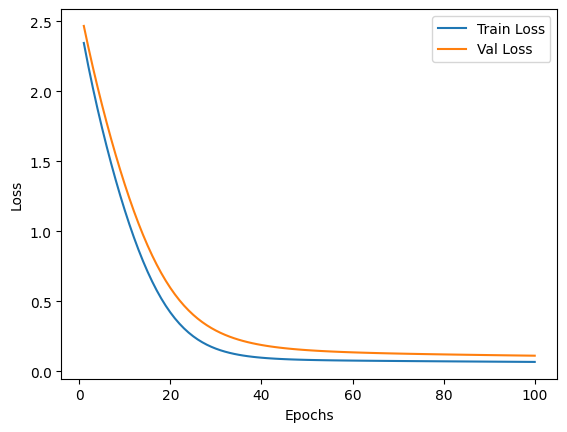

In [9]:
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()